# Pincell Depletion
This is mostly just a copy of the example from the documentation.  Intention is to take some time to play with this functionality.

In [1]:
%matplotlib inline
import math
import openmc

In [2]:
fuel = openmc.Material(name="uo2")
fuel.add_element("U", 1, percent_type="ao", enrichment=4.25)
fuel.add_element("O", 2)
fuel.set_density("g/cc", 10.4)


In [3]:
clad = openmc.Material(name='clad');
clad.add_element("Zr",1);
clad.set_density('g/cc',6.0);


In [4]:
water = openmc.Material(name='water');
water.add_element('O',1);
water.add_element('H',2)
water.set_density('g/cc',1.0)
water.add_s_alpha_beta('c_H_in_H2O');


In [5]:
materials = openmc.Materials([fuel,clad,water]);

In [6]:
radii = [0.42,0.45];

In [7]:
pin_surfaces = [openmc.ZCylinder(r=r) for r in radii]; #fancy syntax

In [8]:
pin_univ = openmc.model.pin(pin_surfaces,materials); # fancy constructor

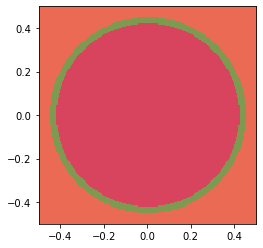

In [9]:
pin_univ.plot();

In [10]:
bound_box = openmc.rectangular_prism(0.62,0.62,boundary_type="reflective");

In [11]:
root_cell = openmc.Cell(fill=pin_univ,region=bound_box);
root_univ = openmc.Universe(cells=[root_cell]);
geometry = openmc.Geometry(root_univ);

In [18]:
settings = openmc.Settings();
settings.particles = 20000;
settings.inactive = 150;
settings.batches = 250;

In [19]:
geometry.export_to_xml();
settings.export_to_xml();

fuel.volume = math.pi * radii[0]**2;
materials.export_to_xml()

In [20]:
# simple non-depletion calculation.
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

      188/1    0.76505    0.76634 +/- 0.00064
      189/1    0.76681    0.76636 +/- 0.00062
      190/1    0.75981    0.76619 +/- 0.00063
      191/1    0.76393    0.76614 +/- 0.00061
      192/1    0.76903    0.76621 +/- 0.00060
      193/1    0.76377    0.76615 +/- 0.00059
      194/1    0.76446    0.76611 +/- 0.00058
      195/1    0.76382    0.76606 +/- 0.00057
      196/1    0.77065    0.76616 +/- 0.00056
      197/1    0.75796    0.76599 +/- 0.00058
      198/1    0.76253    0.76591 +/- 0.00057
      199/1    0.76443    0.76588 +/- 0.00056
      200/1    0.76845    0.76593 +/- 0.00055
      201/1    0.78159    0.76624 +/- 0.00062
      202/1    0.76800    0.76628 +/- 0.00061
      203/1    0.76272    0.76621 +/- 0.00060
      204/1    0.76996    0.76628 +/- 0.00060
      205/1    0.76972    0.76634 +/- 0.00059
      206/1    0.77462    0.76649 +/- 0.00060
      207/1    0.76960    0.76654 +/- 0.00059
      208/1    0.76953    0.76659 +/- 0.00058
      209/1    0.77868    0.76680 

In [26]:
# re-set this to what was used before.
settings = openmc.Settings();
settings.particles = 1000;
settings.inactive = 50;
settings.batches = 100;
settings.export_to_xml();

In [27]:
import openmc.deplete

In [28]:
chain = openmc.deplete.Chain.from_xml("chain_casl_pwr.xml");

In [29]:
chain.nuclide_dict

OrderedDict([('B10', 0),
             ('B11', 1),
             ('O16', 2),
             ('Br81', 3),
             ('Br82', 4),
             ('Kr82', 5),
             ('Kr83', 6),
             ('Kr84', 7),
             ('Kr85', 8),
             ('Kr86', 9),
             ('Sr89', 10),
             ('Sr90', 11),
             ('Y89', 12),
             ('Y90', 13),
             ('Y91', 14),
             ('Zr90', 15),
             ('Zr91', 16),
             ('Zr92', 17),
             ('Zr93', 18),
             ('Zr94', 19),
             ('Zr95', 20),
             ('Zr96', 21),
             ('Nb95', 22),
             ('Mo92', 23),
             ('Mo94', 24),
             ('Mo95', 25),
             ('Mo96', 26),
             ('Mo97', 27),
             ('Mo98', 28),
             ('Mo99', 29),
             ('Mo100', 30),
             ('Tc99', 31),
             ('Tc99_m1', 32),
             ('Tc100', 33),
             ('Ru100', 34),
             ('Ru101', 35),
             ('Ru102', 36),
         

In [30]:
operator = openmc.deplete.Operator(geometry,settings,"chain_casl_pwr.xml");

In [31]:
power = 1e4;
#time_steps = [30*24*60*60]*6
days = 24*3600;
time_steps = [0.1*days, 0.1*days, 0.1*days, 0.3*days, 0.5*days, 1.*days, 2.*days,
              30.*days, 30.*days, 30.*days, 30.*days, 30.*days, 30.*days];

In [32]:
integrator = openmc.deplete.PredictorIntegrator(operator,time_steps,power);

In [33]:
integrator.integrate()

In [34]:
results = openmc.deplete.ResultsList.from_hdf5('./depletion_results.h5');

In [35]:
time, k = results.get_eigenvalue()

In [36]:
time /= (24*60*60)

In [37]:
k

array([[0.76583632, 0.00307034],
       [0.76502888, 0.00252106],
       [0.76069677, 0.00237423],
       [0.76497799, 0.00269683],
       [0.7588762 , 0.0021519 ],
       [0.74910065, 0.00235267],
       [0.74519911, 0.00293997],
       [0.75677579, 0.00296538],
       [1.08644093, 0.00263108],
       [1.15543051, 0.00276634],
       [1.13928194, 0.00288095],
       [1.10380839, 0.00244049],
       [1.05021181, 0.00233852],
       [0.99711522, 0.00194136]])

In [38]:
from matplotlib import pyplot

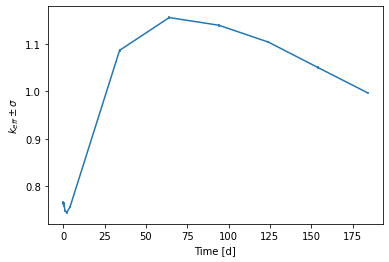

In [39]:
pyplot.errorbar(time,k[:,0],yerr=k[:,1])
pyplot.xlabel('Time [d]');
pyplot.ylabel('$k_{eff}\pm \sigma$');